<a href="https://colab.research.google.com/github/rani1040/30_Days_Of_Data_Science/blob/main/ciphar_dataset_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import datasets , layers, models



In [3]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

In [6]:
y_train[0][0]

6

In [7]:
classes = ['airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
classes[6]

'frog'

In [9]:
def plot_sample(x_train,y_train,classes,i):
  plt.figure(figsize=(3,3))
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i][0]])

In [32]:
y_train.shape

(50000,)

In [33]:
y_train[:5] # this is two dimension array but dont want

array([6, 9, 9, 4, 1], dtype=uint8)

In [34]:
y_train = y_train.reshape(-1,)

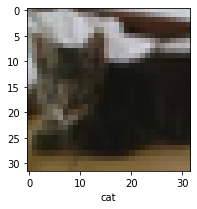

In [35]:
def plot_sample(x_train,y_train,classes,i):
  plt.figure(figsize=(3,3))
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i]])
plot_sample(x_train,y_train,classes,9)

In [36]:
x_train = x_train/np.max(x_train[0])

In [37]:
# lets train ann model 

In [38]:
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [39]:
model.compile(
              optimizer = 'SGD',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']

              )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8140 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6241 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5421 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4820 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4312 - accuracy: 0.4966


In [40]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 185.6361 - accuracy: 0.4467


[185.63607788085938, 0.44670000672340393]

In [41]:





from sklearn.metrics import confusion_matrix , classification_report

y_pred = model.predict(x_test)
y_pred_class = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


In [42]:

print(classification_report(y_pred_class,y_test))

              precision    recall  f1-score   support

           0       0.97      0.15      0.26      6321
           1       0.22      0.13      0.16      1665
           2       0.22      0.18      0.20      1210
           3       0.15      0.19      0.17       769
           4       0.01      0.50      0.02        16
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         0
           7       0.00      0.50      0.01         6
           8       0.00      0.50      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.16     10000
   macro avg       0.16      0.22      0.08     10000
weighted avg       0.69      0.16      0.23     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# now training using cnn

In [44]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [45]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4497 - accuracy: 0.4801
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1098 - accuracy: 0.6096
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9805 - accuracy: 0.6587
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8959 - accuracy: 0.6878
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8272 - accuracy: 0.7123
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7637 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7092 - accuracy: 0.7511
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6666 - accuracy: 0.7635
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6187 - accuracy: 0.7820
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.576

In [47]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 282.2179 - accuracy: 0.4539


[282.2178649902344, 0.453900009393692]

In [48]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.4879138e-23, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.8622869e-04,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9911374e-01, 0.0000000e+00]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 1, 1, 0, 8]

In [50]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)